In [96]:
from datetime import timedelta
import datetime as dt
from pandas.tseries.offsets import BDay
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from ipywidgets import widgets as wg
from ipywidgets import interactive
from IPython.display import display
from itertools import izip
from pandas import *
cmap = plt.get_cmap('viridis')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

sector_info = pd.read_csv('databases/securities.csv')
sector_info = sector_info[['Ticker symbol','Security','GICS Sector', 'GICS Sub Industry']]


# entire_stock_analyst_hist_df = pd.read_csv('entire_ticker_analyst_history')
# snp_500_analyst_history_df = pd.read_csv('snp500analyst_history')
# snp_500_stock_history_df = pd.read_csv('snp500stockHistories')
snp_500_merged_data = pd.read_csv('databases/snp500merged',index_col=0)

#uppercase the firms to fix uniformity mistakes
snp_500_merged_data['firm'] = snp_500_merged_data['firm'].str.upper()

Populating the interactive namespace from numpy and matplotlib


In [97]:
df = snp_500_merged_data.copy()

### Chart Each Ticker

#### Instructions

* 1)Load the imports and databases
* 2)Run the code under this cell
* 3)Type in the symbol into the box and press enter
* 4)Run next cell and select the Institution that you would like to perform analysis (no need to press enter)
* 5)Run the following Cell


In [112]:
def firm_tofromGradeStats(df1):
    lst = []
    for firm in df1.firm.unique().tolist():
        lst1 = []
        lst3 = []
        lst6 = []
        lst9 = []
        lstn = []
        df2 = df1.loc[df1['firm'] == firm]
        unique_grades = df2['toGrade_combined'].unique().tolist()
        cleaned_grades = [x for x in unique_grades if str(x)!= 'nan']
        df3 = pd.DataFrame({'toGrade':cleaned_grades})
        for grade in df3['toGrade'].values:
        
            dayaftersM = df2.loc[df2['toGrade_combined'] == grade]['percent1After'].mean()
            days30M = df2.loc[df2['toGrade_combined'] == grade]['percent30'].mean()
            days60M = df2.loc[df2['toGrade_combined'] == grade]['percent60'].mean()
            days90M = df2.loc[df2['toGrade_combined'] == grade]['percent90'].mean()
            n = len(df2.loc[df2['toGrade_combined'] == grade])
            lst1.append(dayaftersM)
            lst3.append(days30M)
            lst6.append(days60M)
            lst9.append(days90M)
            lstn.append(n)
            
        df3['firm'] = firm
        df3['dayAfterM'] = pd.Series(lst1)
        df3['days30M'] = pd.Series(lst3)
        df3['days60M'] = pd.Series(lst6)
        df3['days90M'] = pd.Series(lst9)
        df3['n'] = pd.Series(lstn)
        
        lst.append(df3)
    concatlist = pd.concat(lst)
    
    return concatlist

def enter_ticker(df):
    ticker = raw_input('Please enter a stock ticker').upper()
    ticker_df = df.loc[df['stockTicker'] == ticker]
    return ticker_df


ticker_data = enter_ticker(snp_500_merged_data)

to_analyst_value_count = ticker_data.firm.value_counts().to_frame().index.values.tolist()

analyst_data = wg.Dropdown(
        options = to_analyst_value_count,
        description = 'Analyst Firm:'  
    )


colors = {'Strong_buy':'g',
          'Buy':'b',
          'Hold': 'y',
          'Sell':'r',
          'Underperform':'p',
          'nan':'pink'}
    
def plot_ticker(df,analyst_data):

    analyst_data_for_ticker_df = df.loc[df['firm'] == analyst_data.value]
    pylab.rcParams['figure.figsize'] = (10,6)
    plt.plot_date(df['Date'],df['Open'],linestyle='solid',marker='None')
    for xc in analyst_data_for_ticker_df.Date:
        c = analyst_data_for_ticker_df.loc[analyst_data_for_ticker_df['Date']==xc].toGrade_combined.iloc[0]
        plt.axvline(x=xc,color=colors[c])


Please enter a stock tickerea


In [20]:
stock_analyst_statsdf = firm_tofromGradeStats(df)

In [113]:
analyst_data

### Chart Description

* The chart is the tickers stock history, the lines provided are the dates the specific stock analyst graded that specific stock color coded with: Buy=Blue, Strong Buy=Green, Hold=Yellow, Sell=Red, Underperform=Purple

Colors :
{'Sell': 'r', 'Underperform': 'p', 'Strong_buy': 'g', 'Buy': 'b', 'nan': 'pink', 'Hold': 'y'}


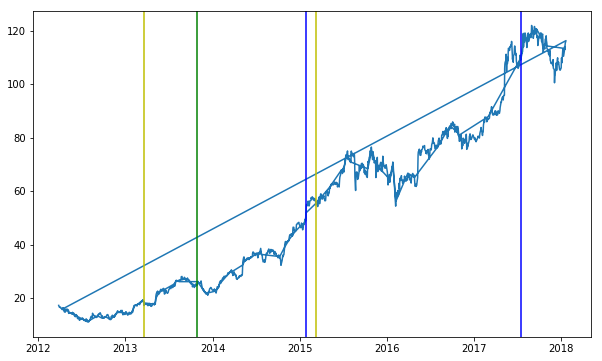

In [114]:
company_list_for_analyst = df.loc[df['firm'] == analyst_data.value]
unique_tick = company_list_for_analyst.stockTicker.unique().tolist()
company_list_for_analystdf = pd.DataFrame({'stockTicker':unique_tick})
n=[]
for tick in unique_tick:
    n.append(len(company_list_for_analyst.loc[company_list_for_analyst['stockTicker']==tick]))
company_list_for_analystdf['n_instances'] = pd.Series(n)  
company_list_for_analystdf = company_list_for_analystdf.sort_values('n_instances',ascending = False)
company_list_for_analystdf = pd.merge(company_list_for_analystdf,sector_info,how='left',left_on=['stockTicker'],right_on=['Ticker symbol']).drop('Ticker symbol',1)
company_list_for_analystdf['firm'] = analyst_data.value

print "Colors :"
print colors
plot_ticker(ticker_data,analyst_data)

* Next cell shows the n_instances that that specific analyst firm has done each of the 5 different grades; and the total means of the percentages 1,30,60, and 90 days after open

In [103]:
stock_analyst_statsdf.loc[stock_analyst_statsdf['firm'] == analyst_data.value]

,toGrade,firm,dayAfterM,days30M,days60M,days90M,n
0,Buy,NEEDHAM,0.222654,4.537209,9.245391,11.780609,50.0
1,Hold,NEEDHAM,0.354848,1.187437,3.468334,4.089647,44.0
2,Strong_buy,NEEDHAM,-1.283937,-3.924341,-2.361644,-0.835646,10.0
3,Underperform,NEEDHAM,0.672845,8.426546,10.376718,9.857519,3.0


* Next cell shows the instances where the lines on the graph occur for the stock ticker selected

In [115]:
ticker_data.loc[ticker_data['firm'] == analyst_data.value][['stockTicker', 'Date', 'Open', 'firm','fromGrade_combined','toGrade_combined','percent1Before','percent1After','percent30','percent60','percent90']]


,stockTicker,Date,Open,firm,fromGrade_combined,toGrade_combined,percent1Before,percent1After,percent30,percent60,percent90
242444,EA,2013-03-19,18.709999,NEEDHAM,NaN,Hold,-0.053437,-8.177440,-9.032598,17.584186,22.715127
242465,EA,2013-10-30,26.129999,NEEDHAM,NaN,Strong_buy,-4.439342,-1.071561,-15.461153,-11.978565,-3.023341
242494,EA,2015-01-26,49.299999,NEEDHAM,NaN,Buy,0.263694,-1.014199,16.937126,14.462477,21.095339
242499,EA,2015-03-10,55.380001,NEEDHAM,NaN,Hold,1.823759,-1.047313,4.694834,11.773205,12.206569
242526,EA,2017-07-18,110.000000,NEEDHAM,NaN,Buy,-0.890912,0.390909,8.354547,8.636364,3.100004


* Next cell shows the stockTickers the specific analysts firm invests in, sorted by decending order of the n_instances of the count that the analyst firm graded individual tickers, as well as the ticker's sector

In [105]:
company_list_for_analystdf

,stockTicker,n_instances,Security,GICS Sector,GICS Sub Industry,firm
0,EA,5,Electronic Arts,Information Technology,Home Entertainment Software,NEEDHAM
1,AAPL,5,Apple Inc.,Information Technology,Computer Hardware,NEEDHAM
2,HOLX,5,Hologic,Health Care,Health Care Equipment,NEEDHAM
3,FFIV,4,F5 Networks,Information Technology,Networking Equipment,NEEDHAM
4,MU,4,Micron Technology,Information Technology,Semiconductors,NEEDHAM
5,MCHP,4,Microchip Technology,Information Technology,Semiconductors,NEEDHAM
6,RMD,4,NaN,NaN,NaN,NEEDHAM
7,KLAC,4,KLA-Tencor Corp.,Information Technology,Semiconductor Equipment,NEEDHAM
8,SYK,4,Stryker Corp.,Health Care,Health Care Equipment,NEEDHAM
9,NVDA,4,Nvidia Corporation,Information Technology,Semiconductors,NEEDHAM


### Basic Mean data for percentage difference after Upgrade or Downgrade

* chose only firms that have more than 25 instances of each action
* n = number of instances
* M as in "dayAfterM" = Mean of price change percentages n days after when the toGrade = the specific action
* sorted by mean_of_buy_percentages (ascending) if the action is either sell or underperform
* sorted by mean_of_buy_percentages (decending) if the action is either buy, strong buy, or hold

In [106]:
buy_stats = stock_analyst_statsdf.loc[stock_analyst_statsdf['toGrade'] == 'Buy'].sort_values('n',ascending = False)
buy_over_25_instances = buy_stats.loc[buy_stats['n'].values>25]
buy_over_25_instances['mean_of_buy_percentages'] = (buy_over_25_instances['dayAfterM']+buy_over_25_instances['days30M']+buy_over_25_instances['days60M']+buy_over_25_instances['days90M'])/4.0
buy_over_25_instances.sort_values('mean_of_buy_percentages',ascending=False)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,toGrade,firm,dayAfterM,days30M,days60M,days90M,n,mean_of_buy_percentages
0,Buy,NEEDHAM,0.222654,4.537209,9.245391,11.780609,50.0,6.446466
0,Buy,LOOP CAPITAL,0.048582,3.420469,6.387306,9.653372,54.0,4.877432
0,Buy,PIVOTAL RESEARCH,0.315154,2.794538,5.428789,10.687737,52.0,4.806555
0,Buy,LAZARD,0.521327,2.687855,7.027607,8.515550,33.0,4.688085
0,Buy,CRT CAPITAL,0.119282,3.787038,5.703902,9.102692,63.0,4.678229
0,Buy,BUCKINGHAM,0.167791,2.845872,5.413050,8.848175,42.0,4.318722
0,Buy,EVERCORE PARTNERS,0.347268,3.380516,6.517802,6.871194,57.0,4.279195
1,Buy,CLSA,0.215081,3.347891,4.245069,9.210128,56.0,4.254542
1,Buy,STIFEL,0.619654,3.954121,4.066919,6.356634,34.0,3.749332
1,Buy,JANNEY CAPITAL,0.091495,4.063806,4.175352,6.538446,62.0,3.717275


In [77]:
sell_stats = stock_analyst_statsdf.loc[stock_analyst_statsdf['toGrade'] == 'Sell'].sort_values('n',ascending = False)
sell_over_25_instances = sell_stats.loc[sell_stats['n'].values>15]
sell_over_25_instances['mean_of_sell_percentages'] = (sell_over_25_instances['dayAfterM']+sell_over_25_instances['days30M']+sell_over_25_instances['days60M']+sell_over_25_instances['days90M'])/4.0
sell_over_25_instances.sort_values('mean_of_sell_percentages',ascending=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,toGrade,firm,dayAfterM,days30M,days60M,days90M,n,mean_of_sell_percentages
3,Sell,DEUTSCHE BANK,-0.213118,-2.256385,-0.334895,-0.503526,68.0,-0.826981
2,Sell,PIPERJAFFRAY,0.005738,0.105913,0.419245,2.328252,19.0,0.714787
2,Sell,UBS,-0.210797,0.320556,1.669751,1.738582,116.0,0.879523
2,Sell,BERENBERG,0.331062,-0.500121,1.851155,3.102829,19.0,1.196231
2,Sell,STIFEL NICOLAUS,0.416373,1.256062,1.811356,1.544759,23.0,1.257137
2,Sell,CITIGROUP,-0.056793,0.333578,2.315602,3.873174,183.0,1.616390
2,Sell,NOMURA,-0.304496,-0.075284,2.977931,4.573421,36.0,1.792893
2,Sell,ATLANTIC EQUITIES,-0.076915,2.189116,3.214430,2.888401,30.0,2.053758
0,Sell,GOLDMAN SACHS,0.276601,1.530660,1.884630,4.587736,209.0,2.069907
1,Sell,JP MORGAN,-0.084841,1.957218,3.224032,3.887826,173.0,2.246059


In [80]:
hold_stats = stock_analyst_statsdf.loc[stock_analyst_statsdf['toGrade'] == 'Hold'].sort_values('n',ascending = False)
hold_over_25_instances = hold_stats.loc[hold_stats['n'].values>25]
hold_over_25_instances['mean_of_hold_percentages'] = (hold_over_25_instances['dayAfterM']+hold_over_25_instances['days30M']+hold_over_25_instances['days60M']+hold_over_25_instances['days90M'])/4.0
hold_over_25_instances.sort_values('mean_of_hold_percentages',ascending=False)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,toGrade,firm,dayAfterM,days30M,days60M,days90M,n,mean_of_hold_percentages
1,Hold,BUCKINGHAM,0.507568,5.291337,8.543591,4.250780,38.0,4.648319
1,Hold,STANDPOINT RESEARCH,0.402987,3.682545,5.321306,6.503961,92.0,3.977700
1,Hold,PIVOTAL RESEARCH,0.311792,2.156313,4.136157,7.622101,39.0,3.556591
1,Hold,CRT CAPITAL,0.193041,3.350467,2.526799,7.399726,28.0,3.367508
0,Hold,SANDLER O'NEILL,-0.020878,3.716578,5.058597,4.672400,34.0,3.356674
0,Hold,NOMURA,0.274757,2.735602,4.573647,5.480104,405.0,3.266028
1,Hold,FBR CAPITAL,-0.199071,3.256870,4.768823,5.024280,168.0,3.212726
0,Hold,TOPEKA,-0.037099,3.538731,3.648995,5.330193,52.0,3.120205
1,Hold,DREXEL HAMILTON,0.704687,1.396703,3.681084,6.630154,36.0,3.103157
0,Hold,COMPASS POINT,0.089324,1.877844,4.099745,5.965891,107.0,3.008201


In [81]:
underperform_stats = stock_analyst_statsdf.loc[stock_analyst_statsdf['toGrade'] == 'Underperform'].sort_values('n',ascending = True)
underperform_over_25_instances = underperform_stats.loc[underperform_stats['n'].values>25]
underperform_over_25_instances['mean_of_underperform_percentages'] = (underperform_over_25_instances['dayAfterM']+underperform_over_25_instances['days30M']+underperform_over_25_instances['days60M']+underperform_over_25_instances['days90M'])/4.0
underperform_over_25_instances.sort_values('mean_of_underperform_percentages',ascending=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,toGrade,firm,dayAfterM,days30M,days60M,days90M,n,mean_of_underperform_percentages
2,Underperform,RAYMOND JAMES,-0.526033,-2.957904,1.164526,1.302877,31.0,-0.254134
4,Underperform,JEFFERIES,-0.537955,0.566294,0.458757,-0.144211,85.0,0.085721
2,Underperform,CLSA,-0.150991,1.165412,2.027547,2.989635,66.0,1.507901
2,Underperform,BMO CAPITAL,-0.202850,0.418322,2.306916,4.506455,42.0,1.757211
2,Underperform,MACQUARIE,-0.497382,0.303399,1.749107,5.527210,56.0,1.770584
2,Underperform,CREDIT SUISSE,-0.439227,1.321531,3.540441,5.041599,144.0,2.366086
2,Underperform,BANK OF AMERICA,-0.010429,2.564335,4.514505,6.434456,175.0,3.375717
0,Underperform,RBC CAPITAL,-0.217930,3.005958,4.617572,7.821866,32.0,3.806866
2,Underperform,BERNSTEIN,0.552486,3.801931,5.377639,7.899127,35.0,4.407796


In [84]:
strong_buy_stats = stock_analyst_statsdf.loc[stock_analyst_statsdf['toGrade'] == 'Strong_buy'].sort_values('n',ascending = False)
strong_buy_over_25_instances = strong_buy_stats.loc[strong_buy_stats['n'].values>25]
strong_buy_over_25_instances['mean_of_strong_buy_percentages'] = (strong_buy_over_25_instances['dayAfterM']+strong_buy_over_25_instances['days30M']+strong_buy_over_25_instances['days60M']+strong_buy_over_25_instances['days90M'])/4.0
strong_buy_over_25_instances.sort_values('mean_of_strong_buy_percentages',ascending=False)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,toGrade,firm,dayAfterM,days30M,days60M,days90M,n,mean_of_strong_buy_percentages
2,Strong_buy,ISI GROUP,-0.095983,2.722394,6.328921,6.866044,35.0,3.955344
0,Strong_buy,WOLFE RESEARCH,0.841386,2.890991,6.351592,5.622999,39.0,3.926742
0,Strong_buy,IMPERIAL CAPITAL,0.431863,1.992408,6.048156,6.845218,105.0,3.829411
0,Strong_buy,SCOTIA HOWARD WEIL,0.917974,1.970384,5.331992,4.713263,28.0,3.233403
1,Strong_buy,PACIFIC CREST,-0.293024,1.786987,4.675471,6.565210,65.0,3.183661
1,Strong_buy,AVONDALE PARTNERS,0.889813,0.954000,4.023348,6.296208,26.0,3.040843
2,Strong_buy,JMP SECURITIES,0.009516,2.771070,3.959804,5.080810,151.0,2.955300
1,Strong_buy,WILLIAM BLAIR,-0.596500,1.984407,3.447795,6.907265,54.0,2.935742
0,Strong_buy,BAIRD,0.079446,1.442229,4.104054,5.305215,241.0,2.732736
0,Strong_buy,BMO CAPITAL,0.334402,1.739139,3.717507,4.980285,523.0,2.692833


In [98]:
df.loc[df['firm'] == "NEEDHAM"]

,stockTicker,Date,Open,Close,Volume,firm,action,fromGrade,fromGrade_combined,toGrade,...,percent1After,30_days_from_grade_Date,30_days_from_grade_Date_Price,percent30,60_days_from_grade_Date,60_days_from_grade_Date_Price,percent60,90_days_from_grade_Date,90_days_from_grade_Date_Price,percent90
7230,ATVI,2017-07-18,60.610001,61.330002,4631300.0,NEEDHAM,init,NaN,NaN,Buy,...,1.583895,2017-08-17,62.570000,3.233788,2017-09-18,65.000000,7.243027,2017-10-18,61.720001,1.831381
38204,GOOG,2013-10-18,485.134674,502.437134,23283100.0,NEEDHAM,main,NaN,NaN,Buy,...,3.571648,2013-11-19,512.526489,5.646229,2013-12-19,536.893005,10.668858,2014-01-20,NaN,NaN
41283,AMZN,2017-04-10,899.630005,907.039978,3184300.0,NEEDHAM,up,NaN,NaN,Buy,...,0.823669,2017-05-10,953.500000,5.988017,2017-06-09,1012.500000,12.546268,2017-07-11,993.000000,10.378711
54267,ABC,2017-04-04,87.059998,86.930000,1372300.0,NEEDHAM,init,NaN,NaN,Buy,...,0.436485,2017-05-04,83.500000,-4.089132,2017-06-05,93.199997,7.052606,2017-07-05,94.910004,9.016777
63286,ANSS,2016-11-22,93.250000,93.879997,410400.0,NEEDHAM,init,NaN,NaN,Hold,...,0.643429,2016-12-22,94.529999,1.372653,2017-01-23,93.010002,-0.257371,2017-02-22,101.330002,8.664882
71263,AAPL,2012-08-22,93.488571,95.552856,141330700.0,NEEDHAM,main,NaN,NaN,Buy,...,1.786312,2012-09-21,100.344284,7.333210,2012-10-23,90.142860,-3.578738,2012-11-22,NaN,NaN
71339,AAPL,2013-02-25,64.835716,63.257141,93144800.0,NEEDHAM,main,NaN,NaN,Buy,...,-2.209981,2013-03-27,65.208572,0.575078,2013-04-26,58.544285,-9.703650,2013-05-28,64.271431,-0.870330
71386,AAPL,2013-08-12,65.265717,66.765717,91108500.0,NEEDHAM,main,NaN,NaN,Buy,...,3.081906,2013-09-11,66.715714,2.221682,2013-10-11,69.570000,6.595014,2013-11-12,73.952858,13.310420
71593,AAPL,2016-04-06,110.230003,110.959999,26404100.0,NEEDHAM,init,NaN,NaN,Strong Buy,...,-0.254020,2016-05-06,93.370003,-15.295291,2016-06-07,99.250000,-9.960993,2016-07-07,95.699997,-13.181535
71676,AAPL,2017-03-24,141.500000,140.639999,22395600.0,NEEDHAM,down,NaN,NaN,Buy,...,-1.491167,2017-04-25,143.910004,1.703183,2017-05-25,153.729996,8.643107,2017-06-26,147.169998,4.007066
